<a href="https://colab.research.google.com/github/kareemrb27/Lab2.1/blob/master/Classification_Algorithms_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Introduction
Imagine you are a data scientist tasked with assisting medical professionals in making critical decisions regarding breast cancer diagnosis. You have access to the Wisconsin Breast Cancer Dataset, a collection of features computed from digitized images of fine needle aspirate (FNA) of breast masses.

<center><img src="https://miro.medium.com/v2/resize:fit:1000/1*VooY3EOMyiA5smL3-s9Neg.png" width=500/></center>

Your goal is to develop a reliable classification model that can accurately predict whether a tumor is malignant or benign based on these features. The challenge is not just to build a model that performs well, but one that can provide insights and support in potentially life-saving decisions, helping to improve patient outcomes and streamline diagnostic processes.


### **Dataset Information:**


- **Origin**: Features are computed from digitized images of a fine needle aspirate (FNA) of a breast mass, specifically describing characteristics of the cell nuclei present in the image.

- **Reference**: The dataset is referenced in the paper by K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets," Optimization Methods and Software 1, 1992, 23-34.

- **Availability**:
  - **FTP**: The dataset is available through the UW CS FTP server:  
    `ftp ftp.cs.wisc.edu`  
    `cd math-prog/cpo-dataset/machine-learn/WDBC/`
  - **UCI Repository**: It is also available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

- **Attribute Information**:
  1. **ID Number**: Unique identifier for each instance.
  2. **Diagnosis**:
     - M = Malignant (cancerous)
     - B = Benign (non-cancerous)
  3. **Features**:
     - **Radius**: Mean of distances from center to points on the perimeter.
     - **Texture**: Standard deviation of gray-scale values, representing variations in smoothness or roughness.
     - **Perimeter**: Length of the boundary of the cell nucleus.
     - **Area**: Size of the cell nucleus.
     - **Smoothness**: Local variation in radius lengths, indicating the smoothness of the cell edge.
     - **Compactness**: Defined as \((\text{perimeter}^2 / \text{area}) - 1.0\), reflecting the compactness of the cell nuclei.
     - **Concavity**: Severity of concave portions of the contour.
     - **Concave Points**: Number of concave portions in the contour.
     - **Symmetry**: Symmetry of the cell nuclei.
     - **Fractal Dimension**: The "coastline approximation," which measures the roughness of the cell boundary.

- **Computation of Features**:
  - Each feature is computed in three ways:
    1. **Mean**: Average value for each feature across all cell nuclei in the image.
    2. **Standard Error (SE)**: Standard deviation of each feature, indicating variation or spread.
    3. **Worst**: The largest value observed for each feature, calculated as the mean of the three largest values.

- **Total Features**: 30 features in total, derived from the above calculations (mean, SE, and worst) for each of the 10 core features.

- **Class Distribution**:
  - **Benign**: 357 samples
  - **Malignant**: 212 samples

- **Data Characteristics**:
  - All feature values are recorded with four significant digits.
  - **Missing Values**: None



# Section 2: Loading the Data & Checking it

In [ ]:
# Import the necessary libraries
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns  # For creating attractive and informative statistical graphics
import matplotlib.pyplot as plt  # For plotting graphs and charts

# Machine learning model metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report,
                             precision_score, recall_score, f1_score,
                             confusion_matrix)

# Setting maximum limit of the number of columns visible
pd.set_option('display.max_columns', 30)

In [ ]:
# Load data from the csv file
data = pd.read_csv('data.csv')

# View the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,...,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,...,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,...,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,...,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,...,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Observation:
Columns `id`, `Unnamed: 32` might not be useful for the analysis.

Let's remove these columns.

In [ ]:
# Drop the unwanted columns
data.drop(columns=['id','Unnamed: 32'],inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,...,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,...,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,...,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,...,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,...,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Check the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Observation:
- The dataset looks clean without any null values.
- The data types of the columns are aligned properly.

# Section 3: EDA
Exploratory Data Analysis (EDA) is crucial for understanding the underlying patterns, relationships, and distributions within a dataset. It helps in detecting anomalies, handling missing data, and validating assumptions before applying machine learning models.

## 3.1 Checking class imbalance

Class imbalance occurs when the number of instances in one class significantly outweighs those in another, leading to biased model predictions. Addressing this imbalance is crucial for building models that perform well across all classes. Let's check whether this dataset is class imbalanced or not.

In [ ]:
# Checking class imbalance
data.diagnosis.value_counts(normalize=True)

,proportion
diagnosis,
B,0.627417
M,0.372583


### Interpretation:
- The dataset suffers from class imbalance.

## 3.2 Encoding the target variable `diagnosis`
- If the cancer is `Benign` i.e `B`, it will be `0`.
- If the cancer is `Malignant` i.e `M`, it will be `1`.

In [ ]:
# Encoding the target variable
data['diagnosis'] = np.where(data['diagnosis'] == 'M', 1, 0)
data['diagnosis'][:5]

,diagnosis
0,1
1,1
2,1
3,1
4,1


## 3.3 Finding the correlation between the features using a heatmap


In [ ]:
# Finding out the correlation between the features
# Find the correlation
corr = data.corr()
corr.shape

(31, 31)

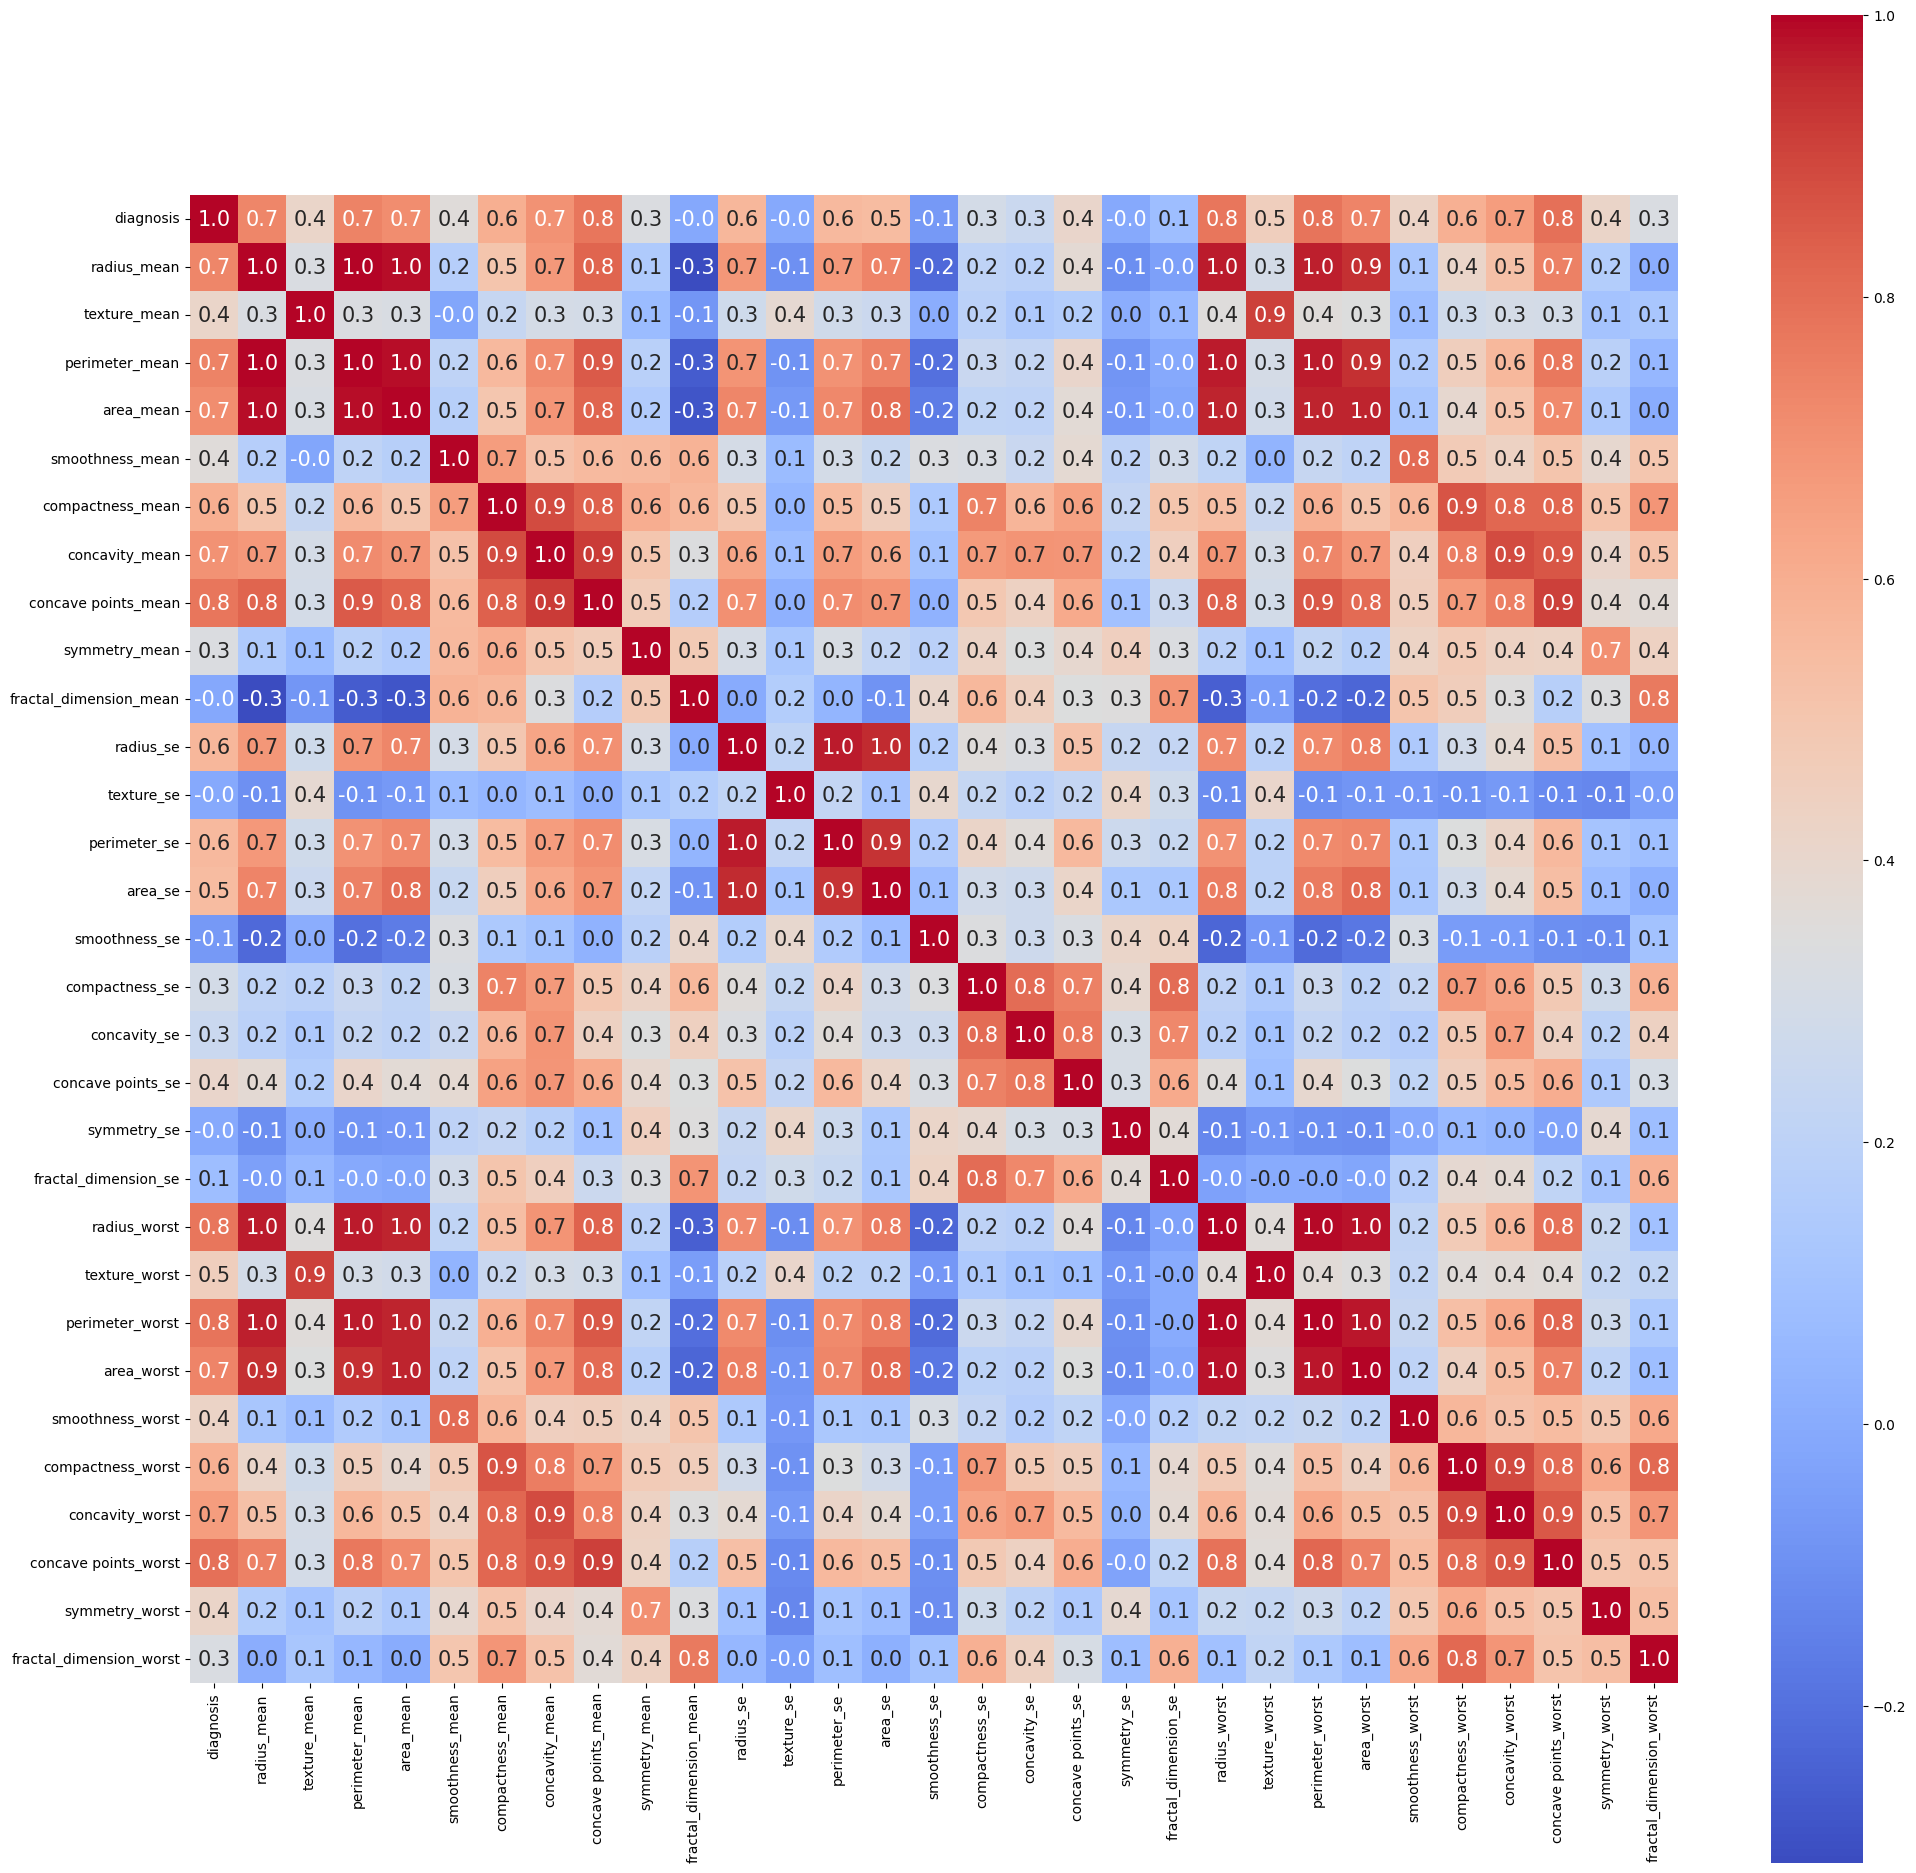

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(24,24))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm')
plt.show()

### Interpretation:


- **Strong Positive Correlations**:
  - `radius_mean`, `perimeter_mean`, and `area_mean` show strong positive correlations with each other (correlation ~1.0), indicating that as the radius increases, both perimeter and area also increase significantly.
  - `compactness_mean`, `concavity_mean`, and `concave points_mean` are strongly correlated, suggesting these features are related to the shape and edges of the cell nuclei.

- **Diagnosis Correlation**:
  - `radius_mean`, `perimeter_mean`, `area_mean`, and their `worst` and `SE` counterparts show a strong positive correlation with the diagnosis (closer to 1), meaning larger values in these features are associated with malignant tumors.
  - `smoothness_mean` and `symmetry_mean` show weaker correlations with diagnosis, indicating these features are less influential in distinguishing between benign and malignant tumors.

- **Negative Correlations**:
  - Features like `fractal_dimension_mean` and `smoothness_mean` generally have lower or negative correlations with other features and diagnosis, suggesting that smoother, less complex boundaries might be associated with benign tumors.

- **Feature Redundancy**:
  - Several features are highly correlated with each other, such as `radius_mean` and `radius_worst`, indicating potential redundancy that could be considered for dimensionality reduction techniques like PCA.



## 3.4 Box- Plot analysis of the variables `radius_worst`, `texture_worst`, `perimeter_worst` wrt to `diagnosis`  

This helps compare the distribution of these features between malignant and benign tumors. It helps identify which features show significant differences between the two classes, indicating their potential predictive power. This analysis aids in understanding the variability within each class and detecting any outliers that may influence the model's performance.

`pd.melt()` transforms a DataFrame from wide to long format, making it easier for analysis and visualization.

- **Wide Format**: Each variable is in its own column (e.g., `radius_worst`, `texture_worst`).
- **Long Format**: Variables are stacked into a single column, with their values in another column.

#### Key Parameters:
- **`id_vars`**: Columns to keep unchanged (e.g., `diagnosis`).
- **`value_vars`**: Columns to unpivot into long format.
  
#### Example:

**Before `pd.melt()` (Wide Format):**

| diagnosis | radius_worst | texture_worst | perimeter_worst |
|-----------|--------------|---------------|-----------------|
| M         | 25.0         | 17.5          | 150.0           |
| B         | 14.5         | 12.3          | 90.5            |

**After `pd.melt()` (Long Format):**

| diagnosis | variable        | value  |
|-----------|-----------------|--------|
| M         | radius_worst     | 25.0   |
| B         | radius_worst     | 14.5   |
| M         | texture_worst    | 17.5   |
| B         | texture_worst    | 12.3   |
| M         | perimeter_worst  | 150.0  |
| B         | perimeter_worst  | 90.5   |

This illustrates how `pd.melt()` converts the wide format data into a long format, making it more suitable for certain types of analyses and visualization like `sns.boxplot`.

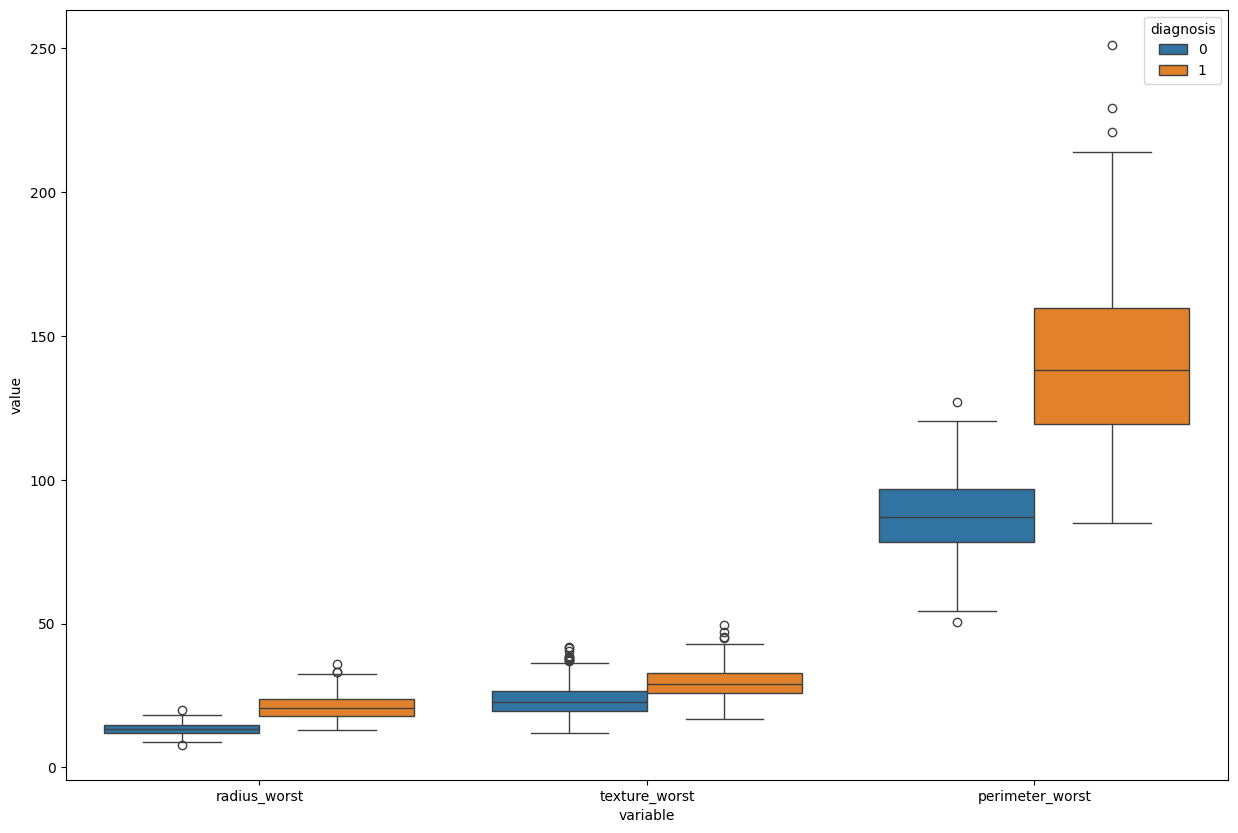

In [ ]:
# Transform the DataFrame from wide to long format
melted_data = pd.melt(data, id_vars="diagnosis", value_vars=['radius_worst', 'texture_worst', 'perimeter_worst'])

# Set the figure size for better visualization
plt.figure(figsize=(15, 10))

# Create a box plot to compare the distributions of 'radius_worst', 'texture_worst', and 'perimeter_worst'
# for each 'diagnosis' (M = malignant, B = benign)
sns.boxplot(x="variable", y="value", hue="diagnosis", data=melted_data)

# Display the plot
plt.show()


### Interpretation:

- **Clear Separation**: The plot shows that malignant tumors (represented by `1`) generally have higher values for `radius_worst`, `texture_worst`, and `perimeter_worst` compared to benign tumors (represented by `0`). This means these features are useful in distinguishing between cancerous and non-cancerous cases.

- **`Perimeter_worst` Stands Out**: Among the three features, `perimeter_worst` shows the biggest difference between malignant and benign tumors. Tumors with higher `perimeter_worst` values are more likely to be malignant.

- **Moderate Difference in `Radius_worst` and `Texture_worst`**: These two features also help differentiate between the two types of tumors, but the difference is not as large as with `perimeter_worst`.

- **Outliers**: The small circles outside the main box represent outliers, which are unusual cases that don’t fit the general pattern. These outliers are more common in benign tumors for these features.

- **Variability**: The wider the box (like in `perimeter_worst` for malignant tumors) shows higher IQR, the more variation there is in that feature for those cases.

## 3.5 Pair Plot analaysis of all the `mean` variables wrt `diagnosis`

In [ ]:
# List down all the columns
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# List down the 'mean' columns:

columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Visualize using the pairplot
sns.pairplot(data=data[columns], hue="diagnosis", palette='rocket')

### Interpretation:
- In many plots, malignant tumors (purple) and benign tumors (orange) form separate clusters, especially in features like `radius_mean`, `perimeter_mean`, and `area_mean`. This means these features are good at distinguishing between cancerous and non-cancerous tumors.
- Features like `radius_mean`, `perimeter_mean`, and `area_mean` are strongly related, meaning as one increases, the others do too. This suggests these features might be telling us similar information.
-The diagonal plots show how each feature is distributed. For example, malignant tumors often have higher values for `radius_mean` and `perimeter_mean` compared to benign tumors.
- Some features, like `texture_mean` and `smoothness_mean`, show more overlap between benign and malignant cases, which means they may not be as effective on their own for diagnosis.
- Features that show clear color separation between malignant and benign cases (like `radius_mean` and `area_mean`) are particularly useful for predicting whether a tumor is cancerous or not.

# Section 4: Feature Engineering
Feature engineering is the process of selecting, modifying, or creating new features from raw data to improve the performance of machine learning models. It involves transforming data into formats that better capture the underlying patterns and relationships for the model.

## 4.1 Scaling the Data
Scaling is essential to ensure that all features are in same range and contribute equally to the model.

In [ ]:
# Check summary statistics before scaling
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,...,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,...,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,...,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,...,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,...,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,...,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,...,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Import the scaler module
from sklearn.preprocessing import StandardScaler

# Dropping the 'diagnosis' column - target variable for Scaling
features = data.drop(columns=['diagnosis'])

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame for easier analysis
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Check summary statistics after scaling
scaled_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,2.372638e-16,-1.123881e-16,-1.123881e-16,-1.311195e-16,-1.529727e-16,1.748260e-16,1.623384e-16,0.000000,8.741299e-17,-6.243785e-18,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,-1.554264e+00,-1.044049e+00,-7.378291e-01,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447,-1.532890e+00,-1.096968e+00,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,-6.948092e-01,-6.237679e-01,-4.947542e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-0.674490,-6.516807e-01,-5.851185e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,-1.974976e-01,-2.866520e-01,-3.477828e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-0.140496,-2.194304e-01,-2.299405e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,2.660996e-01,4.665523e-01,2.430307e-01,1.067726e-01,3.683553e-01,3.896541e-01,3.367521e-01,0.472657,3.556925e-01,2.886421e-01,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,8.906909e+00,6.655279e+00,9.461986e+00,1.104184e+01,8.029999e+00,6.143482e+00,1.207268e+01,6.649601,7.071917e+00,9.851593e+00,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


## 4.2 Perform PCA to reduce the dimensions

### What is PCA?
Principal Component Analysis (PCA) is a dimensionality reduction technique that simplifies a complex dataset by transforming it into fewer dimensions (principal components) while retaining most of the important information. It's like taking a large, detailed picture and summarizing it into a smaller, clearer image.

<center><img src="https://discdown.org/dataanalytics/DataAnalytics_files/figure-html/pca-anim-.gif" width=400 height=400/></center>

### What is Dimensionality Reduction?
Dimensionality reduction is the process of reducing the number of input variables (features) in a dataset. This helps to make the data easier to visualize and work with, while still capturing the key information needed for analysis or modeling.

<center><img src="https://www.sc-best-practices.org/_images/dimensionality_reduction.jpeg"/></center>

### Significance:
- **Simplifies Models**: By reducing the number of features, it makes models less complex and faster to train.
- **Improves Performance**: It can improve model accuracy by removing noise and irrelevant features.
- **Enhances Visualization**: Reduces the data to 2 or 3 dimensions, making it easier to visualize and understand patterns.

*Note: You'll gain a deeper understanding of PCA as you progress through the course. The computation is covered in detail in later modules.*

In [ ]:
# Import the required module
from sklearn.decomposition import PCA


# Applying PCA
pca = PCA(n_components=10)  # Starting with 2 components to visualize
principal_components = pca.fit_transform(scaled_features)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Create a list of (Principal Component, Variability) tuples and sort them in descending order
components_variability = [(f'PC{i+1}', var) for i, var in enumerate(explained_variance)]
components_variability.sort(key=lambda x: x[1], reverse=True)

# Print the variability captured by each component
for component, variability in components_variability:
    print(f'{component}: {variability:.4f}')

PC1: 0.4427
PC2: 0.1897
PC3: 0.0939
PC4: 0.0660
PC5: 0.0550
PC6: 0.0402
PC7: 0.0225
PC8: 0.0159
PC9: 0.0139
PC10: 0.0117


### Interpretation:
- The first principal component captures 44.27% of the total variability in the data, making it the most significant in terms of information retained. This suggests that nearly half of the data's important patterns can be explained by this single component.
- In this case, PC1 and PC2 alone capture over 63% of the variability.
- These results suggest that you could potentially reduce the dataset's dimensionality to the first few components without losing much critical information.


### How to finalize the number of principal components?
To determine the number of principal components (PCs) to finalize, a common approach is to consider the cumulative variance captured by the PCs and set a threshold (typically 85% to 95%) to decide how many components to retain.

### Cumulative Variance Calculation:
Let’s calculate the cumulative variance captured by the first few PCs based on the values you provided:

- **PC1 to PC2**: 44.27% + 18.97% = **63.24%**
- **PC1 to PC3**: 63.24% + 9.39% = **72.63%**
- **PC1 to PC4**: 72.63% + 6.60% = **79.23%**
- **PC1 to PC5**: 79.23% + 5.50% = **84.73%**
- **PC1 to PC6**: 84.73% + 4.02% = **88.75%**
- **PC1 to PC7**: 88.75% + 2.25% = **91.00%**
- **PC1 to PC8**: 91.00% + 1.59% = **92.59%**
- **PC1 to PC9**: 92.59% + 1.39% = **93.98%**
- **PC1 to PC10**: 93.98% + 1.17% = **95.15%**

### Recommendation:

Given this analysis, **finalizing 7 PCs** is a reasonable choice, as it captures about 91% of the data’s variance while reducing dimensionality significantly.

# Section 5: Model Building

## 5.1 Naive Bayes Classifier

- Naive Bayes is a simple yet effective probabilistic machine learning algorithm used for classification tasks.
- It is based on Bayes' Theorem and assumes that the features in a dataset are independent of each other, given the class label—an assumption known as "naive."
- Despite this simplification, Naive Bayes performs well in many real-world scenarios, particularly in text classification problems like spam detection or sentiment analysis.
- The algorithm calculates the probability of each class and selects the one with the highest probability as the prediction.
- Its efficiency and effectiveness, especially with large datasets, make it a popular choice in various applications.

<center><img src="https://insightimi.wordpress.com/wp-content/uploads/2020/04/unnamed-1.png" width=500 height=300/></center>

In [ ]:
# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB

# Separate features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce to the first 7 principal components
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = nb.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9123
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.92      0.84      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



### The model has good accuracy. But, is it solving the purpose?

The goal is to identify the malignant tumours properly. How efficient is this model in doing that?

To answer this, let's understand about Type 1 and Type 2 errors.
### General Explanation:
- **Type 1 Error (False Positive)**: This occurs when the model incorrectly predicts a positive outcome when the actual outcome is negative. In other words, it’s a "false alarm."
  - **Example**: The model incorrectly classifies a benign tumor (non-cancerous) as malignant (cancerous). This could lead to unnecessary stress for the patient and possibly unnecessary treatments or further invasive diagnostic procedures.

- **Type 2 Error (False Negative)**: This happens when the model incorrectly predicts a negative outcome when the actual outcome is positive. This is a "missed detection."
  - **Example**: The model incorrectly classifies a malignant tumor (cancerous) as benign (non-cancerous). This is more serious, as it could lead to a delay in treatment for a patient who actually has cancer, potentially worsening their prognosis.


### How to Calculate?:

<center><img src="https://miro.medium.com/v2/resize:fit:1400/0*9xnNK1z-rLOHBTlw.jpg" width=500/></center>



In [ ]:
# Import the required libraries
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract the components of the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculate Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (FN + TP)

print(f'Type 1 Error Rate (False Positive Rate): {type_1_error_rate:.4f}')
print(f'Type 2 Error Rate (False Negative Rate): {type_2_error_rate:.4f}')


Type 1 Error Rate (False Positive Rate): 0.0423
Type 2 Error Rate (False Negative Rate): 0.1628


### Interpretation:
- The model is fairly efficient at correctly identifying malignant tumors, but there is still a significant risk (16.28%) of missing some malignant cases.
- While the False Positive Rate is low, the False Negative Rate suggests that there is room for improvement in the model's ability to detect all cases of cancer.
- Reducing the Type 2 error rate should be a priority to enhance the model's reliability in identifying malignant tumors.

## 5.2 Decision Tree Classifier

<center><img src="https://media.licdn.com/dms/image/v2/C4D12AQH8UBGIizOq9w/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1564569015262?e=2147483647&v=beta&t=TEx8Lv09jQc4jukaM74CpUFPkjFbTwO9N-XQd6J0Rxw"/></center>

- A Decision Tree is like a flowchart where each question or decision splits the data based on certain features, leading to a final classification.
- The tree starts with a "root" node, which asks the first question. Depending on the answer, the data moves to different branches (nodes) until it reaches a "leaf" node, where the final decision or classification is made.
- At each node, the tree decides the best feature to split the data to separate the classes as clearly as possible.
- You can easily visualize and understand the decision-making process of a decision tree, which makes it a popular choice for explaining models to non-technical audiences.
- Decision trees can handle both categorical and numerical data, making them versatile for different types of classification tasks.
- Decision trees don't require feature scaling, making them straightforward to implement.
- Decision trees are widely used in tasks like customer segmentation, loan approval, medical diagnosis, and many other areas where clear, interpretable decision rules are needed.

In [ ]:
# Import the required libraries
from sklearn.tree import DecisionTreeClassifier

# Separate features and target variable
X = data.drop(columns=['diagnosis'])  # Features
y = data['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9474
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Interpretation:
- Decision Tree classifier gives very good result.


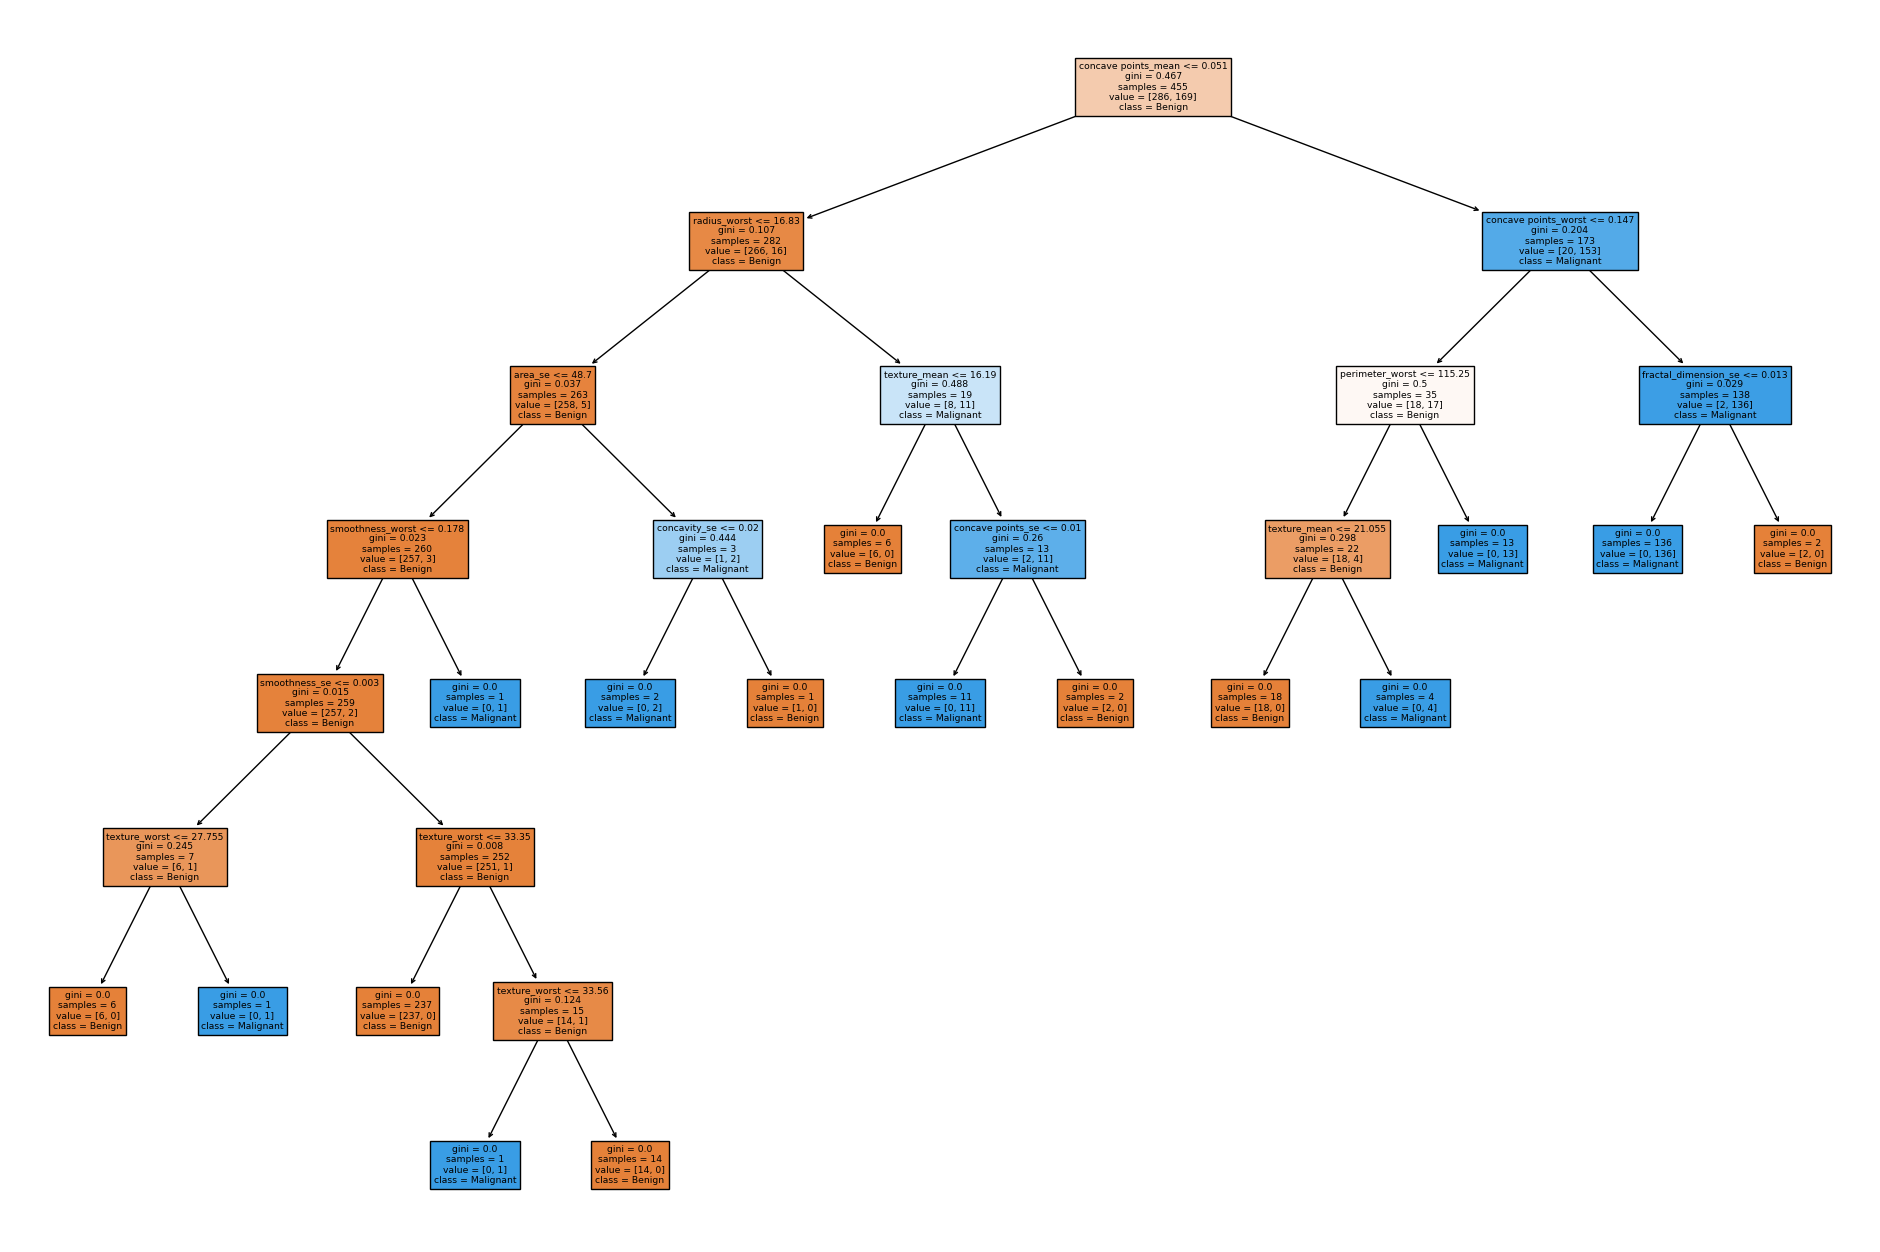

In [ ]:
# Visualize the decision tree
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(24,16))
tree.plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'])
plt.show()


### Interpretation:
Here’s a brief interpretation of the decision tree visualization:

### General Overview:
- **Root Node**: The root node splits the data based on the feature `concave points_mean <= 0.051`, which indicates this feature is the most important one for the initial split between benign and malignant tumors.
- **Decision Paths**: The tree branches out based on different features at each node, with decisions being made to further split the data into more homogeneous groups (either benign or malignant).
- **Leaf Nodes**: These are the end points of the tree where a final decision is made. Each leaf node shows the class (benign or malignant), the number of samples classified in that leaf, and the Gini impurity (a measure of how mixed the classes are in that node, with 0 being pure).

### Key Observations:
- **Feature Importance**: The features that appear closer to the root, such as `concave points_mean`, `radius_worst`, and `concave points_worst`, are the most important for distinguishing between malignant and benign tumors in this model.
- **Class Prediction**:
  - **Blue Nodes**: Represent cases where the model predicts the tumor is malignant.
  - **Orange Nodes**: Represent cases where the model predicts the tumor is benign.

### Gini Impurity Explained

- **What It Is**: Gini Impurity measures how mixed the classes are in a node of a decision tree. It indicates how "pure" or "impure" the node is.
  
- **Formula**:
  <br> <code>Gini Impurity = 1 - Σ (p<sub>i</sub>²)</code> <br> Where <code>p<sub>i</sub></code> is the proportion of samples belonging to class <code>i</code> in the node.

- **Interpretation**:
  - **0**: The node is pure (all samples belong to one class).
  - **0.5**: The node is maximally impure (even mix of classes).

- **Why It Matters**: Decision trees aim to minimize Gini Impurity at each split, leading to clearer, more accurate classifications.



The tree's structure shows a clear decision-making process, with most of the final classifications being pure (as indicated by the Gini impurity of 0 in many leaf nodes). This suggests that the model is effective in making clear distinctions between the two classes based on these features.

### 5.2.1 Using entropy as a criterion

### Entropy Explained

- **What It Is**: Entropy is a measure of uncertainty or disorder in a node of a decision tree. It quantifies the unpredictability or impurity of the node's class distribution.

- **Formula**:
  <br> <code>Entropy = - Σ (p<sub>i</sub> * log<sub>2</sub>(p<sub>i</sub>))</code> <br> Where <code>p<sub>i</sub></code> is the proportion of samples belonging to class <code>i</code> in the node.

- **Interpretation**:
  - **0**: The node is pure (all samples belong to one class), meaning there is no uncertainty.
  - **1**: The node is maximally impure (classes are evenly mixed), indicating high uncertainty.

- **Why It Matters**: Decision trees can use entropy to choose the best splits. A lower entropy after a split means the classes are better separated, leading to more confident predictions.



In [ ]:
# Build a decision tree classifier which uses 'entropy' as the splitting criterion
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the model
dt_entropy.fit(X_train, y_train)

# Predict using the model
y_pred = dt_entropy.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



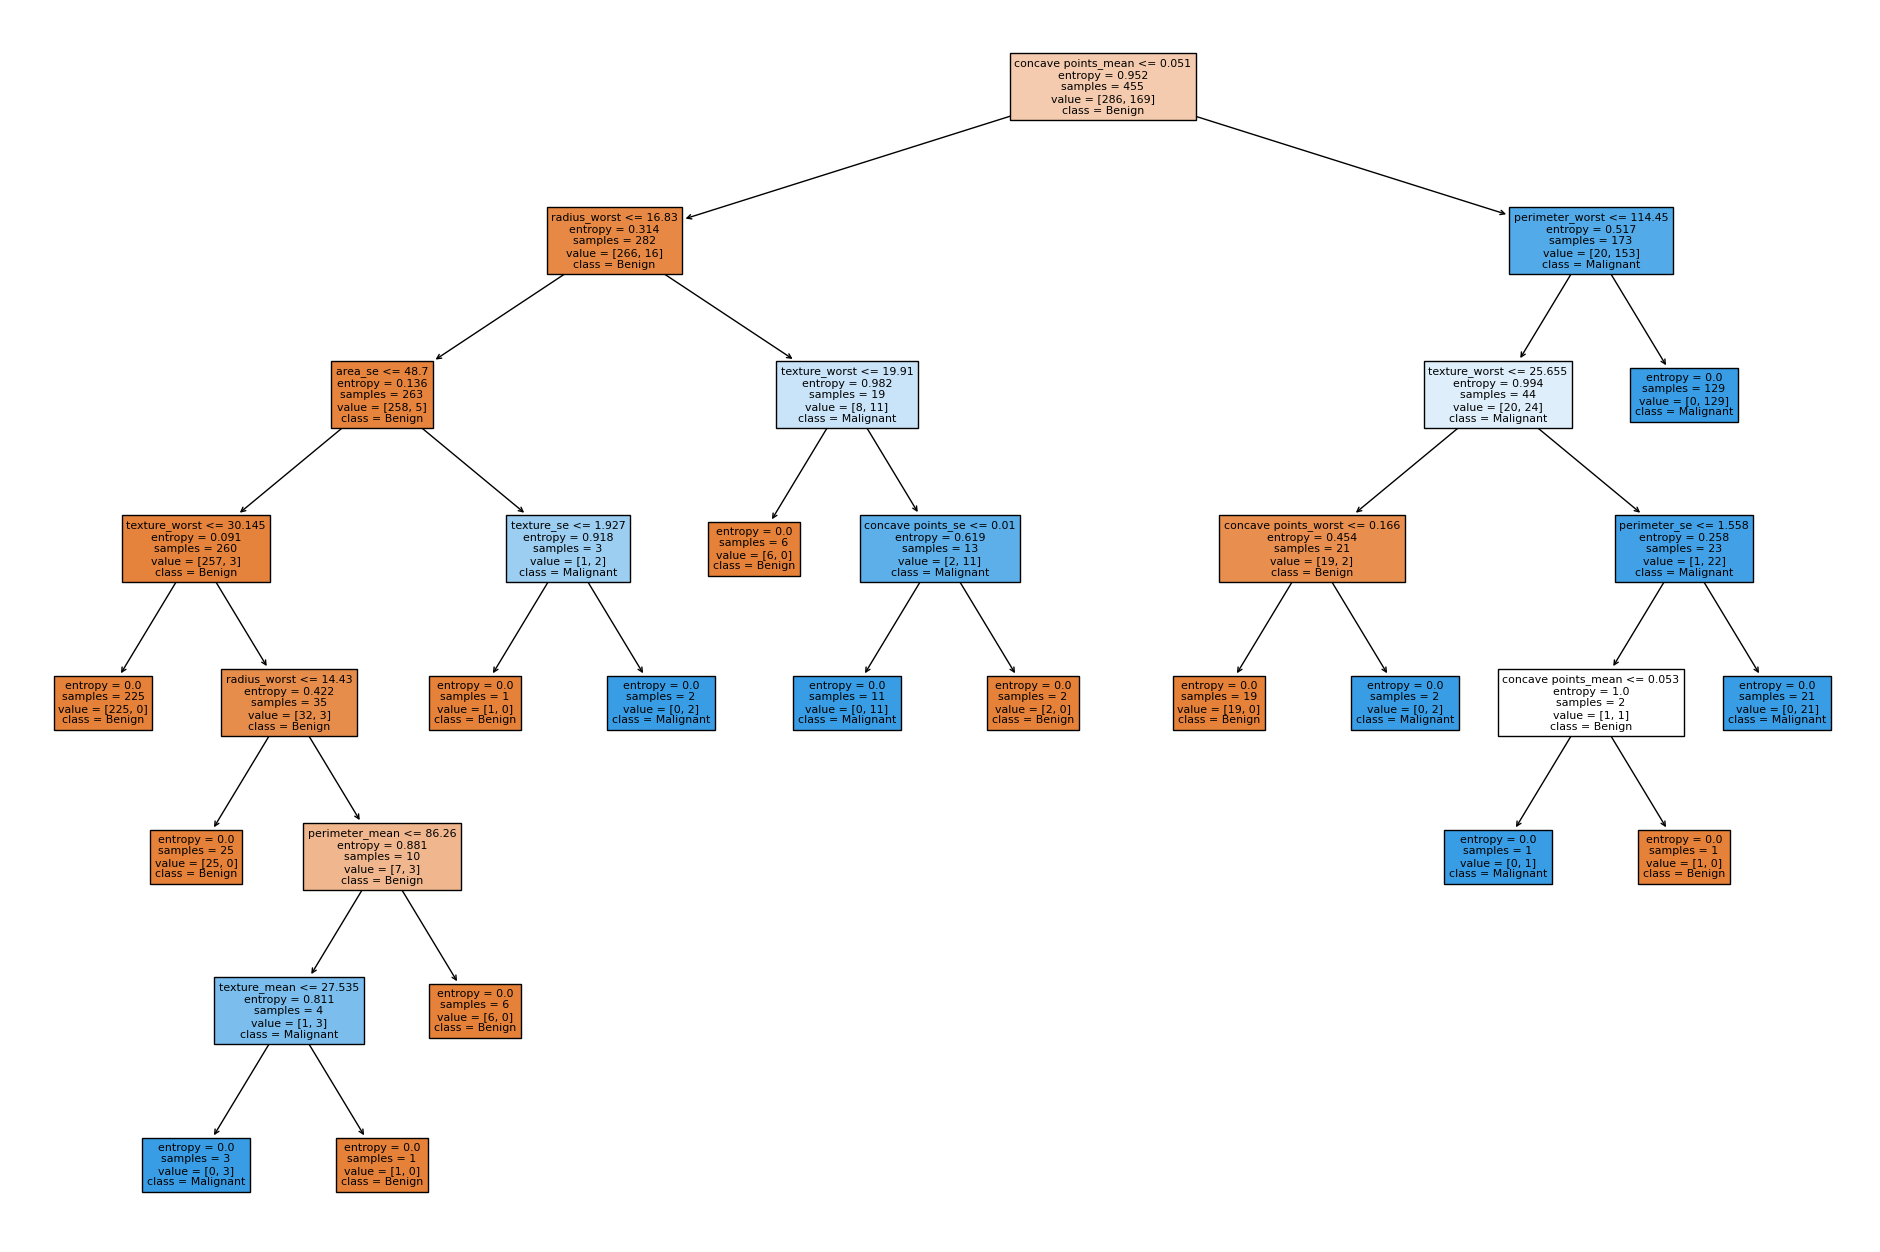

In [ ]:
# Visualize the decision tree
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(24,16))
tree.plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'])
plt.show()


### Interpretation:
- Entropy tree splits slightly differently at some nodes compared to the Gini tree. For example, the entropy tree uses `perimeter_mean <= 86.26` as a split criterion, which was not present in the Gini tree.

### Entropy vs Gini Index



| **Aspect**               | **Entropy**                                               | **Gini Index**                                           |
|--------------------------|-----------------------------------------------------------|----------------------------------------------------------|
| **Measure of Impurity**  | Measures uncertainty or impurity in a node, focusing on class distribution. | Measures the probability of misclassification by randomly picking a class. |
| **Value Range**          | Ranges from 0 (pure) to 1 (maximally impure, evenly mixed). | Ranges from 0 (pure) to 0.5 (maximally impure, evenly mixed). |
| **Splitting Criterion**  | Based on information gain, choosing splits that reduce entropy the most. | Chooses splits that maximize class separation, reducing misclassification. |
| **Computation**          | Involves logarithmic calculations, slightly more computationally intensive. | Uses simpler calculations, making it faster to compute. |
| **Preference**           | Can lead to deeper trees with more balanced splits. | More commonly used due to simplicity, often resulting in similar splits with less computational overhead. |




### 5.2.2 PCA+ Decision Tree Classifier

Let's check whether reducing the dimensionality using PCA has an effect in the performance of the decision tree model.

In [ ]:
# Apply PCA to reduce to the first 7 principal components
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9561
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### Interpretation:
- The model performs exceptionally well, particularly in identifying malignant tumors (high recall), which is crucial for a breast cancer classifier.
- The high precision and recall scores across both classes indicate a robust model with a good balance between sensitivity (recall) and specificity (precision).


In [ ]:
# Calculating the error metrics
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract the components of the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate Type 1 Error Rate (False Positive Rate)
type_1_error_rate = FP / (FP + TN)

# Calculate Type 2 Error Rate (False Negative Rate)
type_2_error_rate = FN / (FN + TP)

print(f'Type 1 Error Rate (False Positive Rate): {type_1_error_rate:.4f}')
print(f'Type 2 Error Rate (False Negative Rate): {type_2_error_rate:.4f}')


Type 1 Error Rate (False Positive Rate): 0.0563
Type 2 Error Rate (False Negative Rate): 0.0233


### Interpretation:
- The model's `Type 1 Error Rate` of 5.63% indicates that a small percentage of benign tumors were incorrectly classified as malignant.
- The `Type 2 Error Rate` of 2.33% is very low, meaning the model rarely misses malignant tumors, which is crucial for early cancer detection.
- Overall, the model is more likely to err on the side of caution, with a strong focus on correctly identifying cancerous cases.
<hr> <hr>